<a href="https://colab.research.google.com/github/supriyamk2/Machine-learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
from sklearn.datasets import load_boston

In [130]:
X, _ = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [131]:
X = pd.DataFrame(X)

In [132]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


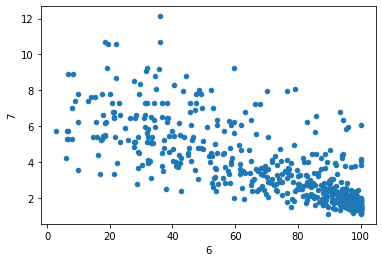

In [113]:
X.plot(kind="scatter", x=6, y=7)

In [114]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [133]:
mu = X.mean()
sigma = X.std()

In [134]:
Xnorm = (X-mu)/sigma

In [135]:
Xnorm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


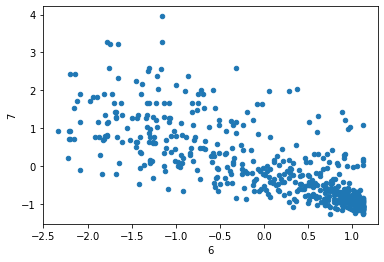

In [118]:
Xnorm.plot(kind="scatter", x=6, y=7)

In [136]:
from scipy.linalg import svd

In [137]:
U,s,Vt = svd(Xnorm, full_matrices=False)

In [138]:
Sigma = np.diag(s)
V = Vt.T

In [139]:
np.allclose(Xnorm,u @ Sigma @ V.T)

True

In [140]:
mu + sigma* pd.DataFrame(u @ Sigma @ V.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,1.800000e+01,2.31,8.187895e-16,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,-7.815970e-14,7.07,4.024558e-16,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,-6.217249e-14,7.07,1.096345e-15,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,-7.460699e-14,2.18,1.332268e-15,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,-7.460699e-14,2.18,8.326673e-16,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,-4.618528e-14,11.93,2.775558e-16,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,-4.263256e-14,11.93,1.942890e-16,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,-6.217249e-14,11.93,2.636780e-16,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,-5.684342e-14,11.93,2.914335e-16,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [141]:
np.allclose(X, mu + sigma* pd.DataFrame(u @ Sigma @ V.T))

True

Project the data into 4 dimensions


In [142]:
r = 4
Ur = U[:,:r]
Sigmar = Sigma[:r,:r]

In [143]:
Xrr = pd.DataFrame(Ur @ Sigmar)

In [144]:
Xrr

,0,1,2,3
0,-2.096223,0.772348,0.342604,0.890892
1,-1.455811,0.591400,-0.694512,0.486977
2,-2.072547,0.599047,0.166956,0.738473
3,-2.608922,-0.006864,-0.100185,0.343381
4,-2.455755,0.097615,-0.075274,0.427484
...,...,...,...,...
501,-0.314656,0.723568,-0.860045,0.434310
502,-0.110404,0.758557,-1.254737,0.309070
503,-0.312052,1.154104,-0.408194,0.785527
504,-0.270252,1.040332,-0.584875,0.677463


Incorporate new data

In [151]:
newhome = [0.044,70,2.24,0.0,0.4,6.87,47.4, 7.82, 5.0, 358, 14.8, 390.86, 6.07]

In [152]:
newhome_norm = (newhome - mu) / sigma

In [153]:
newhome_proj = newhome_norm @ V[:,:r]

In [154]:
newhome_proj

array([-3.64102976, -1.13420566,  1.29886229,  0.04352447])

In [155]:
Xrr.loc[len(Xrr)] = newhome_proj

In [156]:
Xrr

,0,1,2,3
0,-2.096223,0.772348,0.342604,0.890892
1,-1.455811,0.591400,-0.694512,0.486977
2,-2.072547,0.599047,0.166956,0.738473
3,-2.608922,-0.006864,-0.100185,0.343381
4,-2.455755,0.097615,-0.075274,0.427484
...,...,...,...,...
502,-0.110404,0.758557,-1.254737,0.309070
503,-0.312052,1.154104,-0.408194,0.785527
504,-0.270252,1.040332,-0.584875,0.677463
505,-0.125679,0.761225,-1.293602,0.288044


In [157]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing

In [158]:
faces_data = fetch_olivetti_faces()
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True)

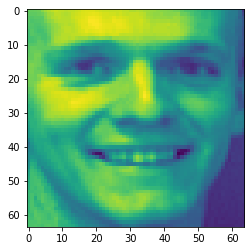

In [159]:
image = faces_data.data[42].reshape(64, 64)
plt.imshow(image)

In [160]:
df = cali_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [161]:
from scipy.linalg import svd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, fetch_california_housing

In [162]:
faces_data = fetch_olivetti_faces()
cali_housing = fetch_california_housing(return_X_y=False, as_frame=True)

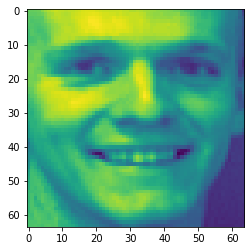

In [163]:
image = faces_data.data[42].reshape(64, 64)
plt.imshow(image)

In [164]:
df = cali_housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [165]:
### GRADED

def svd_norm(X):
    x_norm =( X - X.mean())/X.std()
    U, sigma, VT = svd(x_norm, full_matrices=False)
    Sigma = np.diag(sigma)
    """This function takes in an array X, scales it according 
    to the transformation X - mu / sigma where mu is the mean
    and sigma the standard deviation of the dataset.

    Parameters
    ----------
    X: type `np.array`, shape (N, M)
        
    Returns
    -------
    A tuple (U, Sigma, VT) where
        U: type `np.ndarray`, shape (N, M)
            Numpy arrays with N rows, M columns 
        Sigma: type `np.ndarray`, shape (M, M)
            Numpy arrays with M rows and M columns
            A Diagonal matrix with the singular values on main diagonal
        VT: type `np.ndarray`, shape (M, M)
            Numpy array with M rows and M columns representing V Transpose
    """
    return U, Sigma, VT


# YOUR CODE HERE


# Answer check
U, Sigma, VT = svd_norm(image)
print(U.shape, Sigma.shape, VT.shape)

(64, 64) (64, 64) (64, 64)


(64, 64)


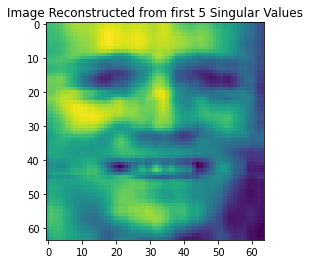

In [166]:

Sigma_copy = np.copy(Sigma)
Sigma_copy[5:, 5:] = 0
simpler_image = U@Sigma_copy@VT
### END SOLUTION

# Answer check
print(simpler_image.shape)
plt.imshow(simpler_image)
plt.title('Image Reconstructed from first 5 Singular Values');

In [167]:
U, Sigma, VT = svd_norm(df)

In [168]:
print(type(U))
print(df.shape, Sigma.shape)

<class 'numpy.ndarray'>
(20640, 9) (9, 9)


In [169]:
def pca(X, r=5):
    U, sigma, VT = svd(X)
    Sigma = np.diag(sigma)
    Ur = U[:, :r]
    Sigma_r = Sigma[:r, :r]
    return pd.DataFrame(Ur @ Sigma_r, columns = [f'pca_{i}' for i in range(1, r + 1)])


In [171]:
XT = pca(df, r = 2)
print(XT.shape)
XT.head()

(20640, 2)


,pca_1,pca_2
0,-328.864961,116.866296
1,-2404.512621,-2.203910
2,-502.725610,110.244305
3,-564.624057,106.700353
4,-571.611024,106.278334


In [172]:
newhome = pd.DataFrame([[3.87, 28.64, 5.43, 1.1, 1425.48, 3.07, 35.63, -119.57, 2.07]], columns = df.columns)
newhome


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3.87,28.64,5.43,1.1,1425.48,3.07,35.63,-119.57,2.07


In [173]:
normed_newhome = (newhome - df.mean())/df.std()
ans5 = normed_newhome@VT.T[:, :2]
ans5.columns = ['pca_1', 'pca_2']

In [174]:
ans5

,pca_1,pca_2
0,-0.00336,0.002261


In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
from scipy.linalg import svd
from sklearn.datasets import make_regression

In [177]:
housing = fetch_california_housing(as_frame = True)

In [178]:
df = housing.frame.drop('MedHouseVal', axis = 1)

In [181]:
### GRADED

def singular_values(X, scale = False):
    """Return the singular values resulting from 
    SVD decomposition.  

    Parameters
    ----------
    X: np.array or pd.DataFrame
        An array of data
    scale: boolean
        Boolean determines whether data needs to be scaled

    Returns an numpy array of singular values of X
    """
    # YOUR CODE HERE 
    if scale:
        X = (X-X.mean()) / X.std()
    U,sigma, VT = svd(X)
        
    return sigma# replace with your return statement

# YOUR CODE HERE


# Answer check
print(type(singular_values(df)))
sigma = singular_values(df)
print(sigma.shape)

<class 'numpy.ndarray'>
(8,)


In [184]:
sigma

array([2.61944385e+05, 1.15841452e+04, 1.67071712e+03, 1.48473291e+03,
       3.69737859e+02, 2.58559824e+02, 2.02975957e+02, 2.54067843e+01])

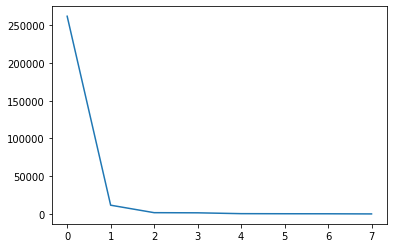

In [186]:
plt.plot(sigma)

In [193]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml

In [194]:
#fetching the data
housing = fetch_openml(name="house_prices", as_frame=True)

In [195]:
#examine the dataframe
housing.frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal,142125.0


In [196]:
#select numeric data and drop missing values
df = housing.frame.select_dtypes(['float', 'int']).dropna(axis = 1)#.select_dtypes(['int', 'float'])

In [197]:
df_scaled = (df - df.mean()) / df.std()

In [198]:
df_scaled

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730272,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.575228,-0.288554,-0.944267,...,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,0.347154
1,-1.727900,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,1.171591,-0.288554,-0.641008,...,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,0.007286
2,-1.725528,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,0.092875,-0.288554,-0.301540,...,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,0.535970
3,-1.723156,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.499103,-0.288554,-0.061648,...,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.515105
4,-1.720785,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,0.463410,-0.288554,-0.174805,...,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,0.869545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.720785,0.073350,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.972685,-0.288554,0.873022,...,-0.751918,-0.100523,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228,-0.074534
1456,1.723156,-0.872264,0.266316,-0.071812,0.381612,0.222899,0.151813,0.759399,0.721865,0.049245,...,2.032535,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,1.644646,0.366036
1457,1.725528,0.309753,-0.147760,0.651256,3.077516,-1.002149,1.023678,-0.369744,-0.288554,0.701025,...,-0.751918,0.201336,-0.359202,-0.116299,-0.270116,-0.068668,4.951415,-0.488943,1.644646,1.077242
1458,1.727900,-0.872264,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.865252,6.090101,-1.283736,...,2.168167,-0.704242,1.473284,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,1.644646,-0.488356


In [199]:
U,sigma,VT = svd(df_scaled)

In [200]:
type(sigma)

numpy.ndarray

In [201]:
sigma.shape

(35,)

In [202]:
percent_variance_explained = sigma / sigma.sum()

In [207]:
int((np.cumsum(percent_variance_explained) < .8).sum())

21